In [1]:
# pip install keras-self-attention
import os, time, gc, sys, io
import datetime, pickle
import warnings, random, pdb

import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import mpl_toolkits.axisartist as AA
import os
import pickle

from scipy import stats
from pandas import Series
from numpy.lib.stride_tricks import sliding_window_view

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import os, time, gc, sys, io
import datetime, pickle, session_info
import warnings, random, math
#
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mpl_toolkits.axisartist as AA
#


ModuleNotFoundError: No module named 'session_info'

### General functions

In [35]:
import pickle

objects = []
with (open("../../dataprocessed/input/5/0.8/scenario_1-AAPL-m-input.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [16]:
objects[4]['INPUT_DATA'].keys()

dict_keys([1, 7, 14, 30, 90])

In [34]:
objects[4]['INPUT_DATA'][1]['trainX']

,0,1,2,3,4
date,,,,,
2015-12-29,0.515236,0.530597,0.524141,0.510650,0.532021
2015-12-30,0.530401,0.523945,0.510454,0.531825,0.516020
2015-12-31,0.531407,0.517916,0.539288,0.523482,0.500552
2016-01-04,0.523882,0.545254,0.529448,0.506518,0.507542
2016-01-05,0.554399,0.538593,0.515663,0.516687,0.487302
...,...,...,...,...,...
2022-05-16,0.846037,0.489403,0.313980,0.516563,0.446661
2022-05-17,0.536331,0.360908,0.563491,0.493589,0.658326
2022-05-18,0.411487,0.614069,0.544167,0.708905,0.334016


In [36]:
objects[4]['INPUT_DATA'][1]['trainX'][-1][:,0]

array([0.6753336 , 0.84007084, 0.46518233, 0.31068552, 0.3213712 ],
      dtype=float32)

In [92]:
X_reshaped = trainX[:, 0, :]
X_reshaped.shape

(1608, 10)

In [93]:
from sklearn.feature_selection import SelectKBest
# Seleccionar las 5 características más relevantes
selector = SelectKBest(k=7)
X_selected = selector.fit_transform(X_reshaped, trainY)

In [94]:
X_selected.shape

(1608, 7)

In [88]:
print(selector.get_feature_names_out())
print(features)

['x0' 'x1' 'x4' 'x5' 'x6' 'x7' 'x9']
Index(['PX_OPEN', 'PX_LAST', 'RSI_14D', 'PX_TREND', 'PX_VTREND',
       'TWEET_POSTIVIE', 'TWEET_NEGATIVE', 'NEWS_POSITIVE', 'NEWS_NEGATIVE',
       'VOLATILITY'],
      dtype='object')


In [74]:
from sklearn.linear_model import ElasticNet

# Crear un objeto Elastic Net
elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.8)
trainX = trainX[:, 0, :]
# Seleccionar las características más representativas
elastic_net.fit(trainX, trainY)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [75]:
elastic_net.score(trainX, trainY)
elastic_net.coef_

NotFittedError: This ElasticNet instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [11]:
X_selected.shape

(1608, 5)

In [20]:
objects[4]['INPUT_DATA']['scenario_2'][1]['vdd']['mean']

date
2016-01-21     25.55685
2016-01-22     25.44725
2016-01-25     25.37535
2016-01-26     25.26200
2016-01-27     25.11760
                ...    
2023-12-20    193.07900
2023-12-21    193.30950
2023-12-22    193.52500
2023-12-26    193.70950
2023-12-27    193.84500
Name: mean, Length: 1995, dtype: float64

In [18]:
objects[4]['INPUT_DATA']['scenario_2'][1]['vdd']['mean']

,PX_OPEN,PX_LAST,RSI_14D,PX_TREND,PX_VTREND,TWEET_POSTIVIE,TWEET_NEGATIVE,NEWS_POSITIVE,NEWS_NEGATIVE,VOLATILITY
date,,,,,,,,,,
2016-01-25,25.55685,25.45600,32.492080,-0.004011,-7.708706e+05,0.085748,0.150335,0.020362,0.021643,0.016450
2016-01-26,25.44725,25.38335,33.139780,-0.002539,-3.937965e+05,0.084013,0.149071,0.016978,0.021618,0.016437
2016-01-27,25.37535,25.26870,33.372830,-0.004195,-6.893146e+05,0.091199,0.146696,0.015611,0.021316,0.016430
2016-01-28,25.26200,25.16820,33.730495,-0.003719,-6.560445e+05,0.089367,0.150004,0.014207,0.022020,0.016422
2016-01-29,25.11760,25.00070,33.692915,-0.004742,-1.355320e+06,0.092958,0.160823,0.015756,0.023822,0.016448
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.07900,193.31850,65.965320,0.001224,1.027949e+05,0.024428,0.056674,0.012368,0.021799,0.013125
2023-12-26,193.30950,193.48700,65.281455,0.000908,8.776774e+04,0.025586,0.057844,0.012880,0.021875,0.013067
2023-12-27,193.52500,193.66850,64.662130,0.000738,7.835327e+04,0.026668,0.058675,0.012814,0.024524,0.013015


In [12]:
objects[4]['INPUT_DATA']['scenario_2'][1]['testX_index']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,,,,,,,,,,,
2022-05-26,0.933265,0.782382,0.824735,0.869441,0.992382,0.761794,0.729882,0.747382,0.687971,0.372382,0.425912,0.454147,0.551500,0.492382,0.287382,0.264147,0.225912,0.314588,0.244735,0.214147
2022-05-27,0.806574,0.848926,0.893632,1.016574,0.785985,0.754074,0.771574,0.712162,0.396574,0.450103,0.478338,0.575691,0.516574,0.311574,0.288338,0.250103,0.338779,0.268926,0.238338,0.473632
2022-05-31,0.860162,0.904868,1.027809,0.797221,0.765309,0.782809,0.723397,0.407809,0.461338,0.489574,0.586926,0.527809,0.322809,0.299574,0.261338,0.350015,0.280162,0.249574,0.484868,0.593103
2022-06-01,0.917000,1.039941,0.809353,0.777441,0.794941,0.735529,0.419941,0.473471,0.501706,0.599059,0.539941,0.334941,0.311706,0.273471,0.362147,0.292294,0.261706,0.497000,0.605235,0.629647
2022-06-02,1.057353,0.826765,0.794853,0.812353,0.752941,0.437353,0.490882,0.519118,0.616471,0.557353,0.352353,0.329118,0.290882,0.379559,0.309706,0.279118,0.514412,0.622647,0.647059,0.586176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,0.512088,0.493853,0.465912,0.461794,0.494735,0.463559,0.477971,0.467676,0.474441,0.599147,0.575029,0.591794,0.559735,0.558853,0.617971,0.704147,0.689735,0.647382,0.649441,0.671206
2023-12-21,0.487074,0.459132,0.455015,0.487956,0.456779,0.471191,0.460897,0.467662,0.592368,0.568250,0.585015,0.552956,0.552074,0.611191,0.697368,0.682956,0.640603,0.642662,0.664426,0.640897
2023-12-22,0.452794,0.448676,0.481618,0.450441,0.464853,0.454559,0.461324,0.586029,0.561912,0.578676,0.546618,0.545735,0.604853,0.691029,0.676618,0.634265,0.636324,0.658088,0.634559,0.607500


In [9]:
objects[4]['INPUT_DATA']['scenario_2'][1]['vdd']['mean']['PX_LAST']

date
2016-01-25     25.45600
2016-01-26     25.38335
2016-01-27     25.26870
2016-01-28     25.16820
2016-01-29     25.00070
                ...    
2023-12-22    193.31850
2023-12-26    193.48700
2023-12-27    193.66850
2023-12-28    193.83150
2023-12-29    193.96900
Name: PX_LAST, Length: 1995, dtype: float64

In [15]:
objects[4]['INPUT_DATA']['scenario_2'][1]['trainY']

array([0.46119037, 0.45431313, 0.43275055, ..., 0.13715598, 0.1379277 ,
       0.3502751 ], dtype=float32)

In [19]:
import numpy as np
print("Annualized volatility: ",round(((objects[4]['INPUT_DATA']['scenario_1'][1]['x'][0][0][9])*np.sqrt(252)*100),2),"%")

Annualized volatility:  26.49 %


In [5]:
print(len(objects[5]['INP_MSERIAL']['AMZN'][1]['x']))
print(len(objects[5]['INP_MSERIAL']['AMZN'][1]['x'][0]))
print(len(objects[5]['INP_MSERIAL']['AMZN'][1]['x'][0][0]))

2216
22
10


In [6]:
objects[5]['test'] = 1
objects[5].keys()

dict_keys(['INP', 'INP_MSERIAL', 'test'])

In [7]:
objects[5]['INP']['TSLA'][1].keys()

dict_keys(['x', 'y', 'nx', 'ny', 'numt', 'vdd', 'trX', 'trY', 'tsX', 'tsY'])

In [12]:
objects[5]['INP']['TSLA'][1]['nx']

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
date,,,,,,,,,,,,,,,,,,,,,
2015-02-03,0.441695,0.438525,0.436815,0.438068,0.437863,0.436381,0.434145,0.434248,0.427585,0.430884,...,0.429002,0.431840,0.433094,0.433680,0.434667,0.435311,0.433391,0.434491,0.434495,0.438019
2015-02-04,0.438605,0.436895,0.438148,0.437942,0.436460,0.434224,0.434327,0.427664,0.430963,0.429519,...,0.431919,0.433173,0.433759,0.434746,0.435390,0.433470,0.434571,0.434575,0.438099,0.440030
2015-02-05,0.436802,0.438055,0.437850,0.436368,0.434132,0.434235,0.427572,0.430871,0.429427,0.430635,...,0.433080,0.433667,0.434654,0.435298,0.433378,0.434478,0.434482,0.438006,0.439938,0.440543
2015-02-06,0.437849,0.437643,0.436161,0.433925,0.434028,0.427365,0.430664,0.429220,0.430428,0.428782,...,0.433460,0.434447,0.435091,0.433171,0.434271,0.434275,0.437799,0.439731,0.440337,0.441144
2015-02-09,0.437608,0.436126,0.433890,0.433993,0.427330,0.430629,0.429185,0.430393,0.428747,0.431585,...,0.434412,0.435056,0.433136,0.434236,0.434240,0.437764,0.439696,0.440301,0.441109,0.438587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,0.391951,0.397665,0.437665,0.390294,0.408236,0.407036,0.478636,0.455379,0.386808,0.401722,...,0.434865,0.427551,0.441665,0.417722,0.392808,0.432979,0.490065,0.504751,0.503036,0.519779
2023-12-21,0.393026,0.433026,0.385655,0.403597,0.402397,0.473997,0.450740,0.382169,0.397083,0.386340,...,0.422912,0.437026,0.413083,0.388169,0.428340,0.485426,0.500112,0.498397,0.515140,0.489369
2023-12-22,0.427384,0.380013,0.397956,0.396756,0.468356,0.445099,0.376527,0.391442,0.380699,0.432413,...,0.431384,0.407442,0.382527,0.422699,0.479784,0.494470,0.492756,0.509499,0.483727,0.511499


In [1]:
import os
import pickle
import sys
sys.path.append('/home/vvallejo/Finance-AI/src/datapreprocessing')

#from datapreprocessing import load_preprocessed_data

processed_path = "/home/vvallejo/Finance-AI/dataprocessed"
win_size = 5

def load_preprocessed_data(path, win, ticker, multi):
    if multi == True:
        fdat = path+ f"/{win}/0.8/{ticker}-m-input-output.pkl"
    else:
        fdat = path+ f"/{win}/0.8/{ticker}-input-output.pkl"

    if os.path.exists(fdat):
        with open(fdat, "rb") as openfile:
            path = pickle.load(openfile)
            fdat = pickle.load(openfile)
            lahead = pickle.load(openfile)
            lpar = pickle.load(openfile)
            tot_res = pickle.load(openfile)

        return path, fdat, lahead, lpar, tot_res
    else:
        raise FileNotFoundError("El archivo {} no existe.".format(fdat))

path, fdat, lahead, lpar, tot_res = load_preprocessed_data(processed_path, win_size, 'CMCSA', multi=False)
win, n_ftrs, tr_tst = lpar


FileNotFoundError: El archivo /home/vvallejo/Finance-AI/dataprocessed/5/0.8/CMCSA-input-output.pkl no existe.

In [20]:
import os
import pickle
import sys
# sys.path.append('Finance-AI/src/DataPreprocessing')
processed_path = "/home/vvallejo/Finance-AI/dataprocessed"
win_size = 5
tr_tst = 0.8

In [25]:
from utils_vv_tfg import load_preprocessed_data
lpar, tot_res = load_preprocessed_data(processed_path, win_size, tr_tst, 'AAPL', True)
win, n_ftrs, tr_tst = lpar
lpar, tot_res_u = load_preprocessed_data(processed_path, win_size, tr_tst, 'AAPL', False)
win, n_ftrs, tr_tst = lpar

In [41]:
tot_res_u['INPUT_DATA']['scenario_1'][1]['nx']

,0,1,2,3,4
date,,,,,
2015-12-29,0.622958,0.641116,0.633484,0.617537,0.642800
2015-12-30,0.640884,0.633253,0.617305,0.642568,0.623884
2015-12-31,0.642074,0.626126,0.651389,0.632705,0.605600
2016-01-04,0.633179,0.658442,0.639758,0.612653,0.613863
2016-01-05,0.669253,0.650568,0.623463,0.624674,0.589937
...,...,...,...,...,...
2023-12-20,0.707474,0.679053,0.590632,0.645895,0.534842
2023-12-21,0.715158,0.626737,0.682000,0.570947,0.563053
2023-12-22,0.668526,0.723789,0.612737,0.604842,0.548000


In [42]:
tot_res['INPUT_DATA']['scenario_1'][1]['nx'][:,0,0].shape

(2010,)

In [9]:
lpar

[5, 1, 0.8, [10, 20, 50]]

In [10]:
tot_res[1].keys()

dict_keys(['x', 'y', 'nx', 'ny', 'numt', 'trainX', 'trainY', 'testX', 'testY', 'vdd'])

In [11]:
tot_res[1]['trainX']

,0,1,2,3,4
date,,,,,
2015-01-08,0.63576,0.59701,0.57511,0.58336,0.60876
2015-01-09,0.59381,0.57191,0.58016,0.60556,0.64856
2015-01-12,0.56114,0.56939,0.59479,0.63779,0.63689
2015-01-13,0.55716,0.58256,0.62556,0.62466,0.61006
2015-01-14,0.57796,0.62096,0.62006,0.60546,0.57556
...,...,...,...,...,...
2022-03-07,0.58070,0.56545,0.76945,0.57045,0.51395
2022-03-08,0.62420,0.82820,0.62920,0.57270,0.34570
2022-03-09,0.85735,0.65835,0.60185,0.37485,0.50760


In [12]:
print(tot_res[1]['x'].shape)
print(tot_res[1].keys())

(2251, 5)
dict_keys(['x', 'y', 'nx', 'ny', 'numt', 'trainX', 'trainY', 'testX', 'testY', 'vdd'])


In [13]:
print(tot_res[1]['trainX'].shape)
print(tot_res[7]['trainX'].shape)
print(tot_res[14]['trainX'].shape)
print(tot_res[30]['trainX'].shape)
print(tot_res[90]['trainX'].shape)

(1800, 5)
(1796, 5)
(1790, 5)
(1777, 5)
(1729, 5)


In [14]:
print(tot_res[1]['testX'].shape)
print(tot_res[7]['testX'].shape)
print(tot_res[14]['testX'].shape)
print(tot_res[30]['testX'].shape)
print(tot_res[90]['testX'].shape)

(451, 5)
(449, 5)
(448, 5)
(445, 5)
(433, 5)


In [15]:
tot_res.keys()

dict_keys([1, 7, 14, 30, 90])

In [67]:
tot_res[7]['cnms']

Index(['PX_OPEN', 'PX_LAST', 'RSI_14D', 'PX_TREND', 'PX_VTREND',
       'TWEET_POSTIVIE', 'TWEET_NEGATIVE', 'NEWS_POSITIVE', 'NEWS_NEGATIVE',
       'VOLATILITY', 'MOMENTUM'],
      dtype='object')

In [68]:
tot_res[1]['idtest']

DatetimeIndex(['2021-04-26', '2021-04-27', '2021-04-28', '2021-04-29',
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07',
               ...
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-27'],
              dtype='datetime64[ns]', name='date', length=649, freq=None)

In [72]:
tot_res[1]['trainX'].shape

(1514, 10, 11)

In [12]:
testX  = tot_res['INP']['TSLA'][1]['tsX'] 
nptstX = testX.to_numpy().reshape(testX.shape[0],testX.shape[1],1)
nptstX.shape


(445, 22, 1)

In [13]:
a = tot_res['INP']['TSLA'][1]['vdd']["mean"].to_numpy()
a

array([ 13.56133636,  13.54745909,  13.56361364, ..., 243.24772727,
       243.81363636, 244.93181818])

In [14]:
tot_res['INP']['TSLA'][1]['vdd']["mean"].shape

(2223,)

In [15]:
tot_res['INP']['TSLA'][1]['vdd']["min"].shape

(2223,)

In [17]:
tot_res['INP']['TSLA'][1]['vdd']["max"].shape

(2223,)

In [ ]:
import os
import pickle

tmod = 'stcklstm' #stcklstm lstm

def load_preprocessed_data(path, win, multi=False):
        '''
        Returns the preprocessed data as a list of objects
        
        Arguments:
        path - path to the preprocessed data
        win - window size
        multi - boolean value to indicate if the data is multivariate or not
        '''

        if multi == False:
            fdat = 'D:/Escritorio/TFG/Finance-AI/DataProcessed/model-'+tmod+'-output.pkl'

        else:
            fdat = 'D:/Escritorio/TFG/Finance-AI/DataProcessed/model-'+tmod+'-output.pkl'

        with (open(fdat, "rb")) as openfile:
            while True:
                try:
                    path      = pickle.load(openfile)
                    fdat     = pickle.load(openfile)
                    lahead    = pickle.load(openfile)
                    lpar      =pickle.load(openfile)
                    stock_list= pickle.load(openfile)
                    tot_res   = pickle.load(openfile)
                    df_dict   = tot_res['INP']
                except EOFError:
                    break
        return path, fdat, lahead, lpar, stock_list, tot_res, df_dict

path, fdat, lahead, lpar, stock_list, tot_res, df_dict = load_preprocessed_data("../../DataProcessed", 22, multi=True)

In [ ]:
tot_res['OUT_MODEL'].keys()

dict_keys(['MODEL', 'AAPL'])

In [ ]:
tot_res['OUT_MODEL']['AAPL'][1].keys()

Index(['MSEP', 'MSEY', 'Stock', 'DY', 'ALG', 'seed', 'epochs', 'nhn', 'win',
       'ndims', 'lossh', 'nit', 'model', 'ttrain', 'bsize'],
      dtype='object')

In [ ]:
tot_res['OUT_MODEL']['AAPL'][1]['MSEP']

0    14.327103
1    14.036024
2    18.918038
3    17.348941
4    15.230134
5    17.846885
6    14.259746
7    16.689693
8    18.072058
9    14.273346
Name: MSEP, dtype: float64

In [ ]:
tot_res['OUT_MODEL']['AAPL'][1]['MSEY']

0    7.685193
1    7.685193
2    7.685193
3    7.685193
4    7.685193
5    7.685193
6    7.685193
7    7.685193
8    7.685193
9    7.685193
Name: MSEY, dtype: float64

In [ ]:
pred = tot_res['OUT_MODEL']['AAPL'][1]['DY'][9]['Y_predicted']
real = tot_res['OUT_MODEL']['AAPL'][1]['DY'][9]['Y_real']
yesterday = tot_res['OUT_MODEL']['AAPL'][1]['DY'][9]['Y_yesterday']

mse_p = tot_res['OUT_MODEL']['AAPL'][1]['MSEP']
mse_y = tot_res['OUT_MODEL']['AAPL'][1]['MSEY']

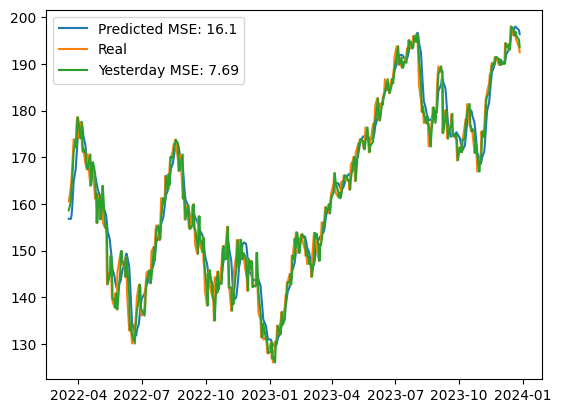

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pred, label=f'Predicted MSE: {round(mse_p.mean(),2)}')
plt.plot(real, label='Real')
plt.plot(yesterday, label=f'Yesterday MSE: {round(mse_y.mean(),2)}')
plt.legend()
plt.show()

In [ ]:
def stck_lstm_fun(trainX, trainY, testX, testY, Y, vdd, epoch, bsize, nhn, win, n_ftrs, ahead, stock, seed, multi):
        '''
        Stack LSTM model

        Returns the evaluation of the model with the test data
        
        Arguments:
        trainX - normalized training data
        trainY - normalized training labels
        testX - normalized test data
        testY - normalized test labels
        Y - output PX_OPEN stock
        vdd - validation dataframe storing the data for normalization and denormalization
        epoch - number of epochs for training
        bsize - batch size for feeding the model
        nhn - number of hidden neurons
        win - window size (days considered to learn from == trainX.shape[1])
        n_ftrs - number of expected outputs (1 in our case)
        stock - stock being evaluated
        ahead - shift value for the stock
        seed - seed to stabilize the repetitions
        '''
        if multi:
            nptrX = trainX.to_numpy().reshape(trainX.shape[0],trainX.shape[1],trainX.shape[2],n_ftrs)
            nptrY = trainY.to_numpy()
        else:
            nptrX = trainX.to_numpy().reshape(trainX.shape[0],trainX.shape[1],n_ftrs)
            nptrY = trainY.to_numpy()
        nit  = 0
        lloss= np.nan
        while math.isnan(lloss) and nit < 5:
            tf.random.set_seed(seed)
            # create a very Stcked-LSTM model
            stmodel = Sequential()
            stmodel.add(LSTM(nhn, activation='relu', return_sequences=True, input_shape=(win,n_ftrs)))
            stmodel.add(LSTM(nhn, activation='relu', return_sequences=True))
            stmodel.add(LSTM(nhn, activation='relu'))
            stmodel.add(Dense(n_ftrs)) # Output of a single value
            stmodel.compile(loss='mean_squared_error', optimizer='adam')
            hist = stmodel.fit(nptrX, nptrY, epochs=epoch, batch_size=bsize, verbose=0)
            lloss= hist.history['loss'][-1]
            nit  = nit + 1
        # Predict
        nptstX = testX.to_numpy().reshape(testX.shape[0],testX.shape[1],n_ftrs)
        nptstY = testY.to_numpy()
        res1   = eval(nptstX, nptstY, testX, stmodel, vdd, Y, ahead)
        df_result = {'MSEP':res1.get("msep"),'MSEY': res1.get("msey"),'Stock':stock,
                    'DY':res1.get("Ys"),'ALG':'STACK-LSTM','seed':seed,'epochs':epoch,
                    'nhn':nhn,'win':win ,'ndims':1, 'lossh':lloss, 'nit':nit,
                    'model':stmodel}
        return(df_result)



In [ ]:


sol   = stck_lstm_fun(trainX,trainY,testX,testY,Y,vdd,epochs,bsize,nhn,win_size,n_ftrs,ahead,stock,seed)